## Import Packages

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import plotly.graph_objects as go
import matplotlib.cm as cm
from scipy import stats
import json
import requests
import folium
from IPython.display import HTML,display

## Load data

In [116]:
df= pd.read_csv('Auto_Insurance_Dataset.csv', low_memory=False)
pd.set_option('display.max_rows', 1000)
sns.set_style("white")
df.head()

,Customer,StateCode,State,ClaimAmount,Response,Coverage,Education,EffectiveToDate,EmploymentStatus,Gender,...,MonthsSincePolicyInception,NumberofOpenComplaints,NumberofPolicies,PolicyType,Policy,ClaimReason,SalesChannel,TotalClaimAmount,VehicleClass,VehicleSize
0,BU79786,KS,Kansas,276.351928,No,Basic,Bachelor,2011-02-24,Employed,F,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,NE,Nebraska,697.953590,No,Extended,Bachelor,2011-01-31,Unemployed,F,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2011-02-19,Employed,F,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,MO,Missouri,764.586183,No,Basic,Bachelor,2011-01-20,Unemployed,M,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,KS,Kansas,281.369258,No,Basic,Bachelor,2011-02-03,Employed,M,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 25 columns):
Customer                      9134 non-null object
StateCode                     9134 non-null object
State                         9134 non-null object
ClaimAmount                   9134 non-null float64
Response                      9134 non-null object
Coverage                      9134 non-null object
Education                     9134 non-null object
EffectiveToDate               9134 non-null object
EmploymentStatus              9134 non-null object
Gender                        9134 non-null object
Income                        9134 non-null int64
LocationCode                  9134 non-null object
MaritalStatus                 9134 non-null object
MonthlyPremiumAuto            9134 non-null int64
MonthsSinceLastClaim          9134 non-null int64
MonthsSincePolicyInception    9134 non-null int64
NumberofOpenComplaints        9134 non-null int64
NumberofPolicies              

## Prepare functions

In [302]:
#Functions for plots
def plot_sp(title,fontsize,xlabel,ylabel):
    plt.title(title,fontsize=fontsize)
    plt.xlabel(xlabel,fontsize=fontsize)
    plt.ylabel(ylabel,fontsize=fontsize)
    fig = plt.gcf()
    fig.set_size_inches( 12, 10)
    plt.show()
#Functions for statistics
def pearson_r(x, y):
    corr_mat=np.corrcoef(x,y)
    return corr_mat[0,1]
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

In [193]:
df.describe()

,ClaimAmount,Income,MonthlyPremiumAuto,MonthsSinceLastClaim,MonthsSincePolicyInception,NumberofOpenComplaints,NumberofPolicies,TotalClaimAmount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,800.494047,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,687.096761,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,189.800768,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,399.425179,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,578.018220,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,896.216704,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,8332.538119,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


# Data

The data was obtained from the Emcien data repository [data](http://dyzz9obi78pm5.cloudfront.net/app/image/id/560ec66d32131c9409f2ba54/n/Auto_Insurance_Claims_Sample.csv) in a CSV file format. The data includes Auto Insurance claims data from  2011 to 2019; it has 9134 rows and each row represents a unique policyholder; its columns represents 25 different features, which excludes the customer ID, of a policyholder.

Auto insurance policy is a contract between the policyholder and insurance company; it is designed to protect the driver against the financial loss of an accident or theft. All the U.S. drivers must have liability insurance that meets the legal requirements, which are different in every state.

An insurance claim is a formal compensation request of the policyholder to the insurance company. If the complaint is approved, payment will be issued to the policyholder based on the terms and conditions. In this data set, the claim amount refers to the amount that was claimed by a policyholder; the total claim amount refers to the amount that was approved by the insurance company.

## Comparison of claim amounts with total claim amounts

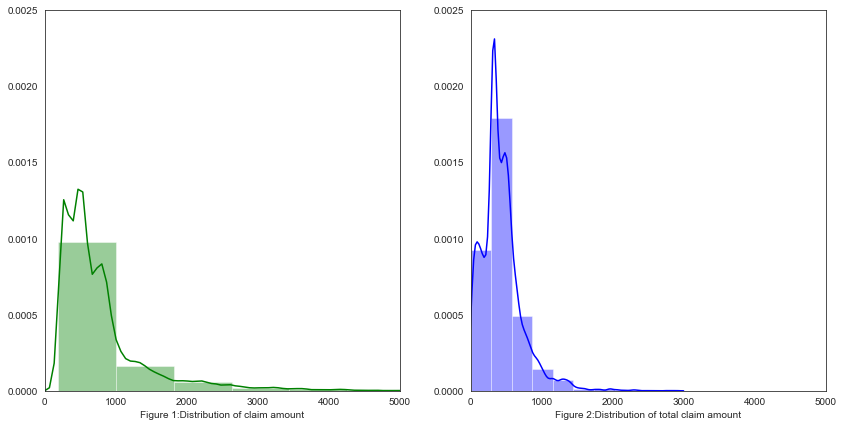

In [75]:
fig,axes=plt.subplots(1,2)
sns.distplot(df['ClaimAmount'],bins=10,color="green",ax=axes[0],
             axlabel='Figure 1:Distribution of claim amount').set(xlim=(0,5000),ylim=(0,0.0025))
sns.distplot(df['TotalClaimAmount'],bins=10,color="blue",ax=axes[1],
             axlabel='Figure 2:Distribution of total claim amount').set(xlim=(0,5000),ylim=(0,0.0025))
fig = plt.gcf()
fig.set_size_inches( 14, 7)
plt.show()

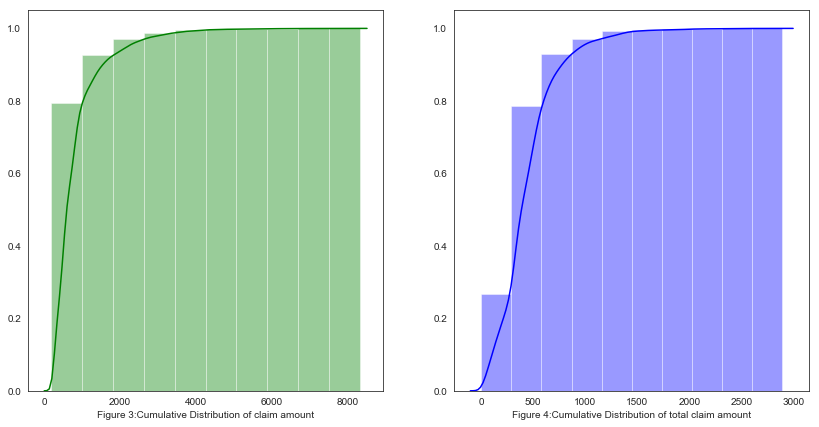

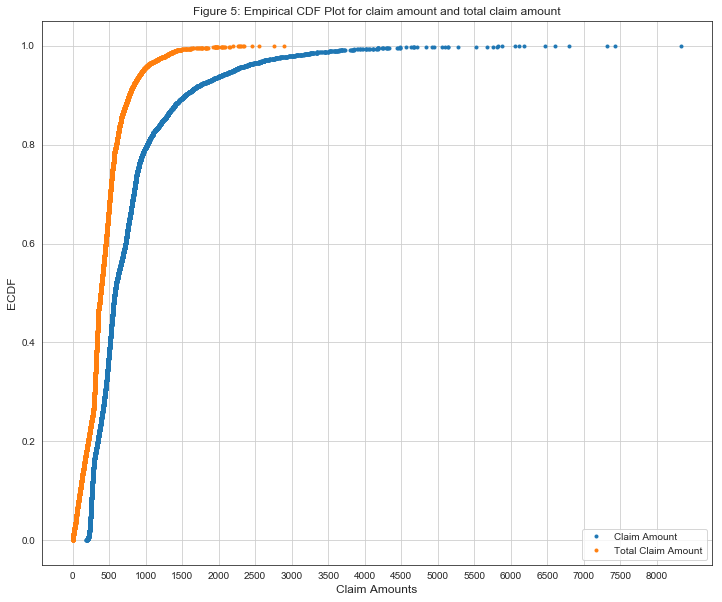

In [165]:
fig,axes=plt.subplots(1,2)
sns.distplot(df['ClaimAmount'],bins=10,color="green",ax=axes[0],
             axlabel='Figure 3:Cumulative Distribution of claim amount',hist_kws={'cumulative': True},
             kde_kws={'cumulative': True})
plt.grid()
sns.distplot(df['TotalClaimAmount'],bins=10,color="blue",ax=axes[1],
             axlabel='Figure 4:Cumulative Distribution of total claim amount',hist_kws={'cumulative': True},
             kde_kws={'cumulative': True})
fig = plt.gcf()
fig.set_size_inches( 14, 7)
plt.grid()
plt.show()
x_ca,y_ca=ecdf(df['ClaimAmount'])
x_tca,y_tca=ecdf(df['TotalClaimAmount'])
_=plt.plot(x_ca,y_ca,marker='.',linestyle='none')
_=plt.plot(x_tca,y_tca,marker='.',linestyle='none')
plt.grid()
plt.legend(('Claim Amount','Total Claim Amount'),loc='lower right')
plt.xticks([0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500,7000,7500,8000])
fig = plt.gcf()
fig.set_size_inches( 12, 8)
plot_sp('Figure 5: Empirical CDF Plot for claim amount and total claim amount',12,
        'Claim Amounts','ECDF')
plt.show()

In [82]:
no_claim=df[df.MonthsSinceLastClaim==0]
print(len(no_claim),' customer do not have any claims.')
num_claim=df[df.MonthsSinceLastClaim!=0]


314  customer do not have any claims.


Figure 1 illustrates the claim amount (CA) as a cumulative distribution function (CDF). Figure 2 illustrates the total claim amount (TCA) as CDF. As can be seen, TCA is less than the CA. According to Figure 5, %80 of the CA is less than 1000; however, %80 percent of the TCA is less than 600.

## Income & Total Claim Amount

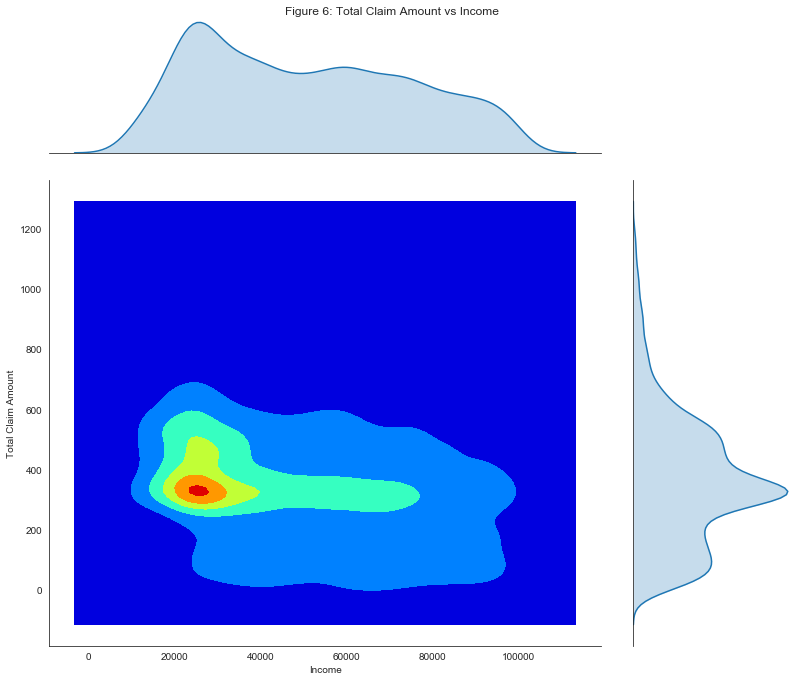

6817 customer have an income.
2317 customer do not have an income.


In [77]:
data=df[df.Income>0]
no_income=df[df.Income==0]
data_new=data.sort_values('TotalClaimAmount')
data_plot=data_new[:-100]
g=sns.jointplot(x='Income', y='TotalClaimAmount', data=data_plot,kind="kde",cmap=cm.jet,
              n_levels=5,ratio=3 )
g.fig.suptitle('Figure 6: Total Claim Amount vs Income')
g.set_axis_labels("Income",'Total Claim Amount')
fig = plt.gcf()
fig.set_size_inches( 12, 10)
plt.show()
print(len(data),'customer have an income.')
print(len(no_income),'customer do not have an income.')

Figure 6 illustrates the variation of the total claim amount (TCA) with income. TCA is higher between \$20,000.00-\$40,000.00 income, and TCA is between \$200.00-\$600.00. The higher TCAs mostly overlap with the lower-income range.


## Students

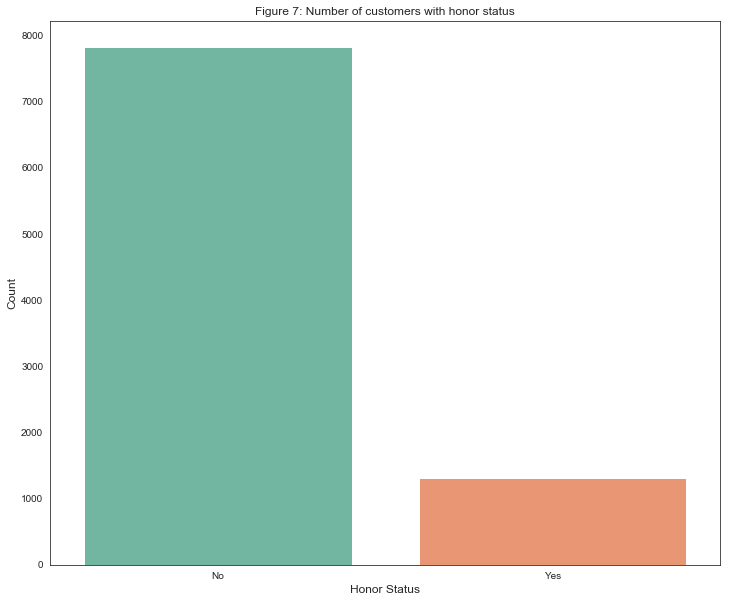

1308  students have honor status. They must be high school students.


In [206]:
sns.countplot(x="Response", data=df,palette="Set2")
plot_sp('Figure 7: Number of customers with honor status',12,
        'Honor Status','Count')
honor_status=df[df.Response=='Yes']
print(len(honor_status),' Students have honor status. They must be high school students.')

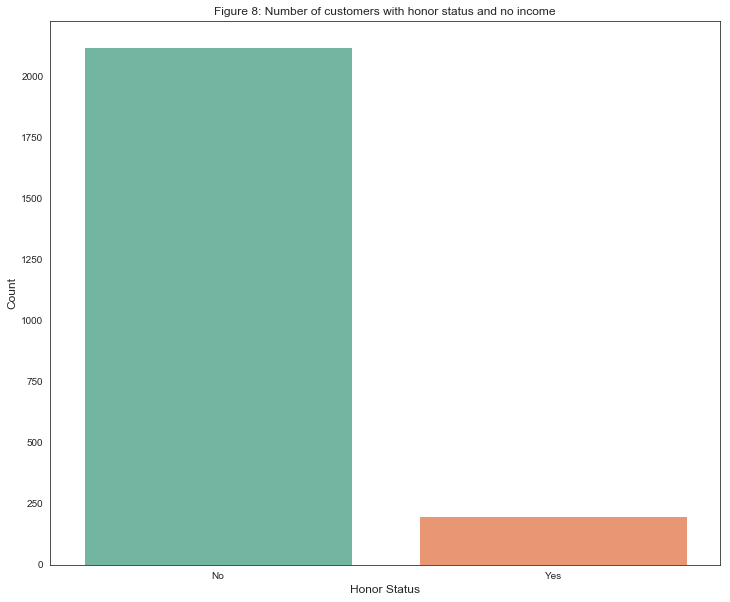

198  students have honor status without income.


In [207]:
sns.countplot(x="Response", data=no_income,palette="Set2")
plot_sp('Figure 8: Number of customers with honor status and no income',12,
        'Honor Status','Count')
honor_status_no=no_income[no_income.Response=='Yes']
print(len(honor_status_no),' students have honor status without income.')

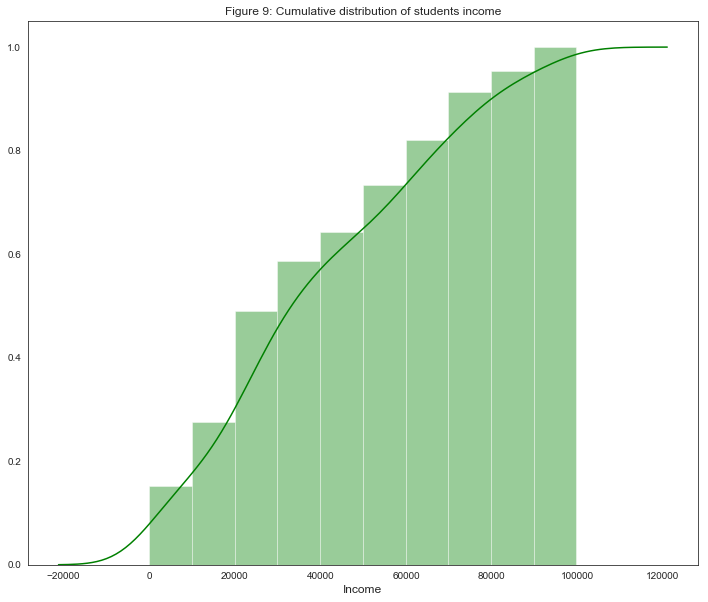

In [210]:
df_students=df[df.Response=='Yes']
sns.distplot(df_students['Income'],bins=10,color="green",hist_kws={'cumulative': True},
             kde_kws={'cumulative': True})
plot_sp('Figure 9: Cumulative distribution of students income',12,'Income','')

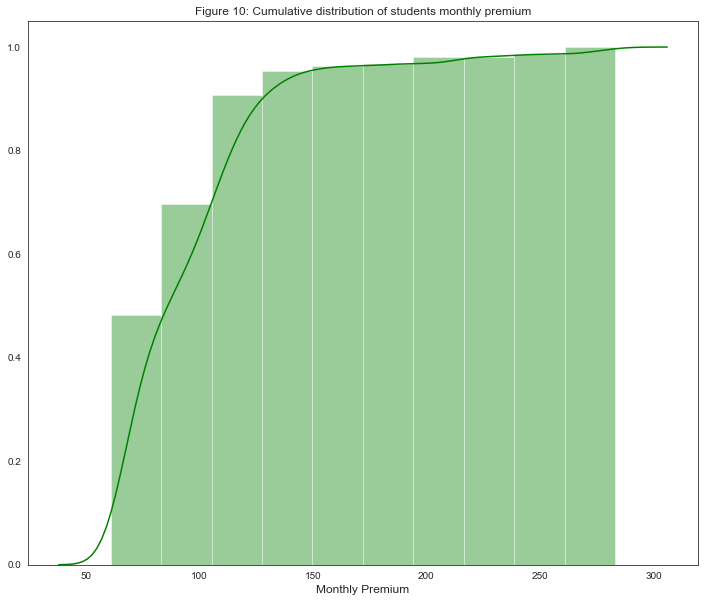

In [211]:
sns.distplot(df_students['MonthlyPremiumAuto'],bins=10,color="green",hist_kws={'cumulative': True},
             kde_kws={'cumulative': True})
plot_sp('Figure 10: Cumulative distribution of students monthly premium',12,'Monthly Premium','')

%70 of the students pay less than 100 \$ monthly premium.

## Monthly Premium & Total Claim Amount

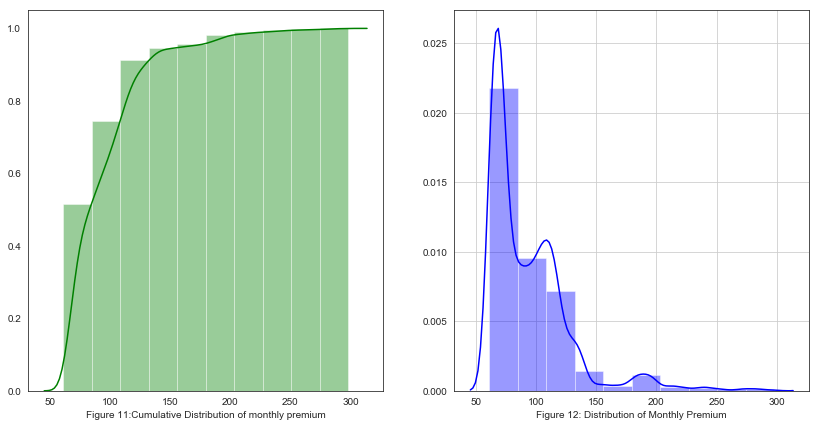

In [212]:
fig,axes=plt.subplots(1,2)
sns.distplot(df['MonthlyPremiumAuto'],bins=10,color="green",ax=axes[0],
             axlabel='Figure 11:Cumulative Distribution of monthly premium',hist_kws={'cumulative': True},
             kde_kws={'cumulative': True})
sns.distplot(df['MonthlyPremiumAuto'],bins=10,color="blue",norm_hist=True,ax=axes[1],
             axlabel='Figure 12: Distribution of Monthly Premium')
fig = plt.gcf()
fig.set_size_inches( 14, 7)
plt.grid()
plt.show()

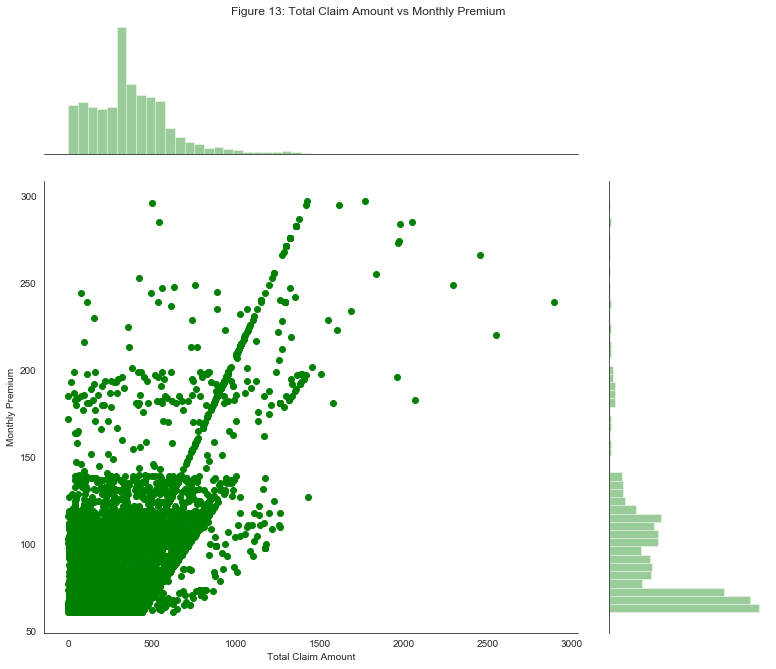

In [301]:
g=sns.jointplot(y='MonthlyPremiumAuto', x='TotalClaimAmount', data=data,height=5,
                ratio=3, color="g" )
g.fig.suptitle('Figure 13: Total Claim Amount vs Monthly Premium')
g.set_axis_labels("Total Claim Amount","Monthly Premium")
fig = plt.gcf()
fig.set_size_inches( 12, 10)
plt.show()

According to Figure 13, there is a correlation between the total claim amount and monthly premiums.

In [183]:
# Correlation
a=data.MonthlyPremiumAuto
b=data.TotalClaimAmount
r=pearson_r(a,b)
print(r)

0.6360837170803693


In [132]:
Iowa=df[df.State=='Iowa']
Missouri=df[df.State=='Missouri']
Oklahoma=df[df.State=='Oklahoma']
Nebraska=df[df.State=='Nebraska']
Kansas=df[df.State=='Kansas']
print(len(Iowa),len(Missouri),len(Kansas),len(Nebraska),len(Oklahoma))
print(sum(Iowa.MonthlyPremiumAuto*Iowa.MonthsSincePolicyInception),
      sum(Missouri.MonthlyPremiumAuto*Missouri.MonthsSincePolicyInception),
      sum(Kansas.MonthlyPremiumAuto*Kansas.MonthsSincePolicyInception),
      sum(Nebraska.MonthlyPremiumAuto*Nebraska.MonthsSincePolicyInception),
      sum(Oklahoma.MonthlyPremiumAuto*Oklahoma.MonthsSincePolicyInception))
print(sum(Iowa.TotalClaimAmount),sum(Missouri.TotalClaimAmount),sum(Kansas.TotalClaimAmount),
      sum(Nebraska.TotalClaimAmount),sum(Oklahoma.TotalClaimAmount))

2601 3150 798 1703 882
11867224 14015820 3671747 7504705 4043462
1126265.621524002 1379130.6936029987 348202.18935999967 724390.5431440012 386977.9996230004


In [174]:
# Create a table
headerColor = 'grey'
rowEvenColor = 'lightgrey'
rowOddColor = 'white'
data_tbl = {'States' : ['Missouri','Iowa', 'Nebraska', 'Oklahama', 'Kansas'],
            'Number of Customers' : [ 3150, 2601, 1703, 882, 798], 
            'Paid by customers' : ['$14,015,820', '$11,867,224', '$7,504,705', '$4,043,462', '$3,671,747'],
            'Sum of Total Claim Amounts' : ['$1,379,130.69','$1,126,265.62','$724,390.54','$386,977.99', '$348,202.18'],
            'Percentages' : ['%9.8','%9.5','%9.7','%9.6','%9.5'] }
dft = pd.DataFrame(data_tbl)
fig = go.Figure(data=[go.Table(
  header=dict(
    values=["States", "Number of Customers",'Paid by customers','Sum of Total Claim Amounts','Percentages'],
    line_color='darkslategray', fill_color=headerColor,
    align=['left'], font=dict(color='white', size=12)
  ),
  cells=dict(
    values=[dft["States"], dft["Number of Customers"],dft['Paid by customers'],dft['Sum of Total Claim Amounts'],dft['Percentages']],
    line_color='darkslategray', fill_color=[[rowOddColor,rowEvenColor,rowOddColor, rowEvenColor,rowOddColor]*5],
    align=['left','center'], font=dict(color='darkslategray', size=11)
  ))
])
fig.update_layout(
    title=go.layout.Title(text="Table 1: Number of customers and calculations based on states",
        xref="paper",
        x=0.5
    ))
fig.show()

Table 1 shows the number of policyholders in each of the five states; it shows the total premium paid by customers to the insurance company; it shows the amount of money paid by the insurance company for the claims. An interesting finding is that the total claim amount is %10 of the total premium in every state.

Figure 10 demonstrates that majority of customers buy low monthly premium policies, which have high deductibles.

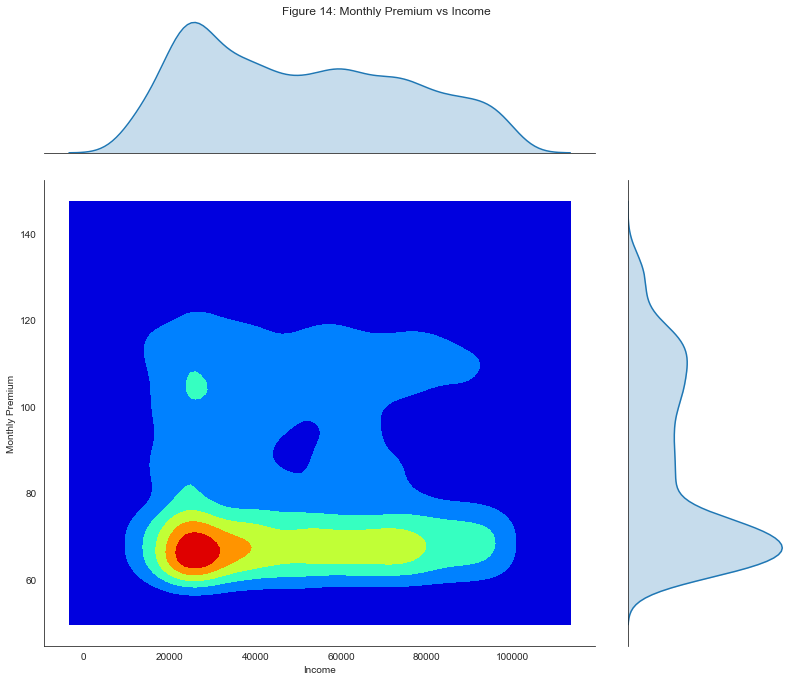

In [214]:
data_sorted=data.sort_values('MonthlyPremiumAuto')
data_sort_plot=data_sorted[:-500]
g=sns.jointplot(y='MonthlyPremiumAuto', x='Income', data=data_sort_plot,kind="kde",cmap=cm.jet,
              n_levels=5,ratio=3 )
g.fig.suptitle('Figure 14: Monthly Premium vs Income')
g.set_axis_labels('Income',"Monthly Premium")
fig = plt.gcf()
fig.set_size_inches( 12, 10)
plt.show()

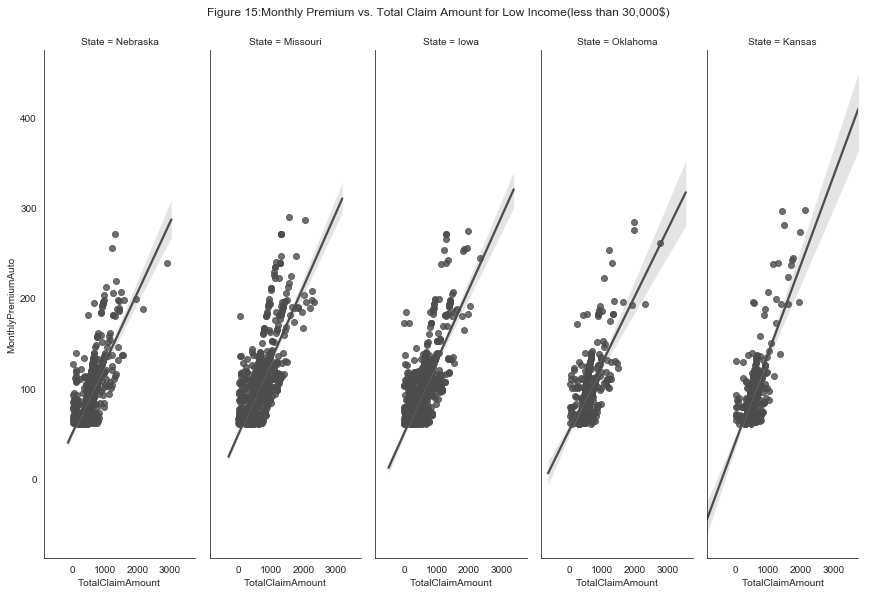

In [271]:
low=df[df.Income<30000]
middle=df[df.Income<65000]
high=df[df.Income<100000]
g=sns.FacetGrid(low,col='State',margin_titles=True)
g.map(sns.regplot,'TotalClaimAmount', 'MonthlyPremiumAuto', color=".3", fit_reg=True, x_jitter=.1)
g.fig.suptitle('Figure 15:Monthly Premium vs. Total Claim Amount for Low Income(less than 30,000$)',y=0.95,fontsize=12)
fig = plt.gcf()
fig.set_size_inches( 12, 10)
plt.show()

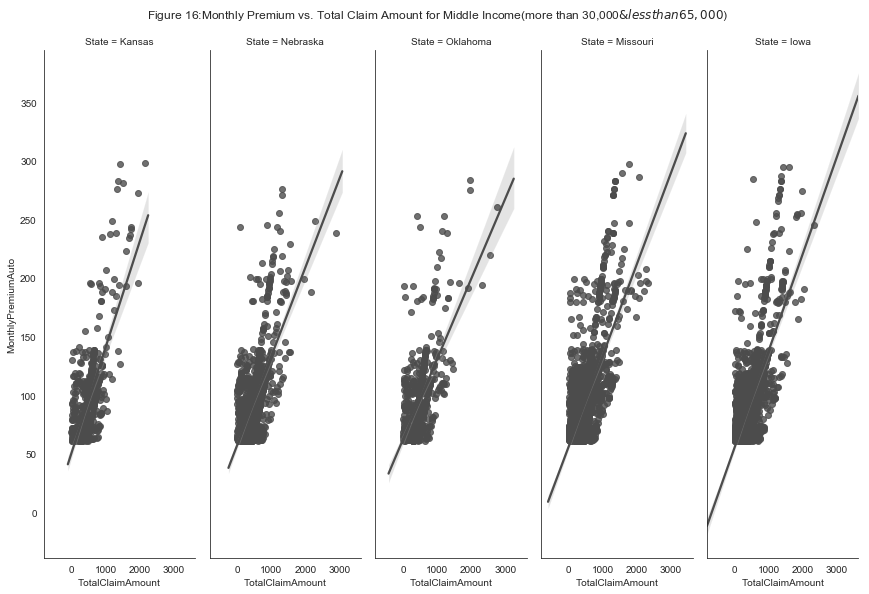

In [272]:
h=sns.FacetGrid(middle,col='State',margin_titles=True)
h.map(sns.regplot,'TotalClaimAmount', 'MonthlyPremiumAuto', color=".3", fit_reg=True, x_jitter=.1)
h.fig.suptitle('Figure 16:Monthly Premium vs. Total Claim Amount for Middle Income(more than 30,000$ & less than 65,000$)',y=0.95,fontsize=12)
fig = plt.gcf()
fig.set_size_inches( 12, 10)
plt.show()

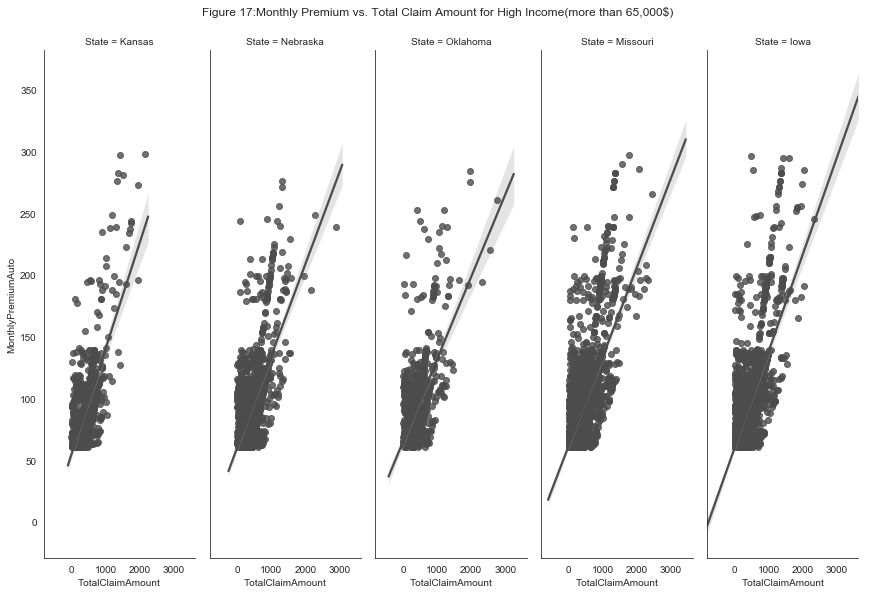

In [273]:
k=sns.FacetGrid(high,col='State',margin_titles=True)
k.map(sns.regplot,'TotalClaimAmount', 'MonthlyPremiumAuto', color=".3", fit_reg=True, x_jitter=.1)
k.fig.suptitle('Figure 17:Monthly Premium vs. Total Claim Amount for High Income(more than 65,000$)',y=0.95,fontsize=12)
fig = plt.gcf()
fig.set_size_inches( 12, 10)
plt.show()

## What are the factors that impact the monthly premiums?

### Policies

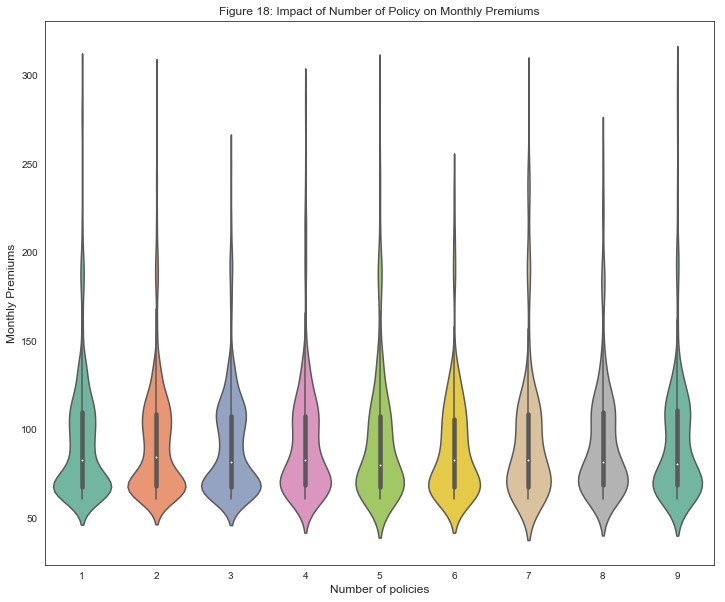

                  MonthlyPremiumAuto
NumberofPolicies                    
1                          94.219625
2                          93.261552
3                          91.134418
4                          91.941320
5                          93.567568
6                          90.483871
7                          94.937644
8                          93.125000
9                          92.682692


In [274]:
sns.violinplot(x='NumberofPolicies',y='MonthlyPremiumAuto', data=df,palette="Set2")
plot_sp('Figure 18: Impact of Number of Policy on Monthly Premiums',12,
        'Number of policies','Monthly Premiums')
mean_num_policy=df.groupby('NumberofPolicies').agg({'MonthlyPremiumAuto':'mean'})
print(mean_num_policy)

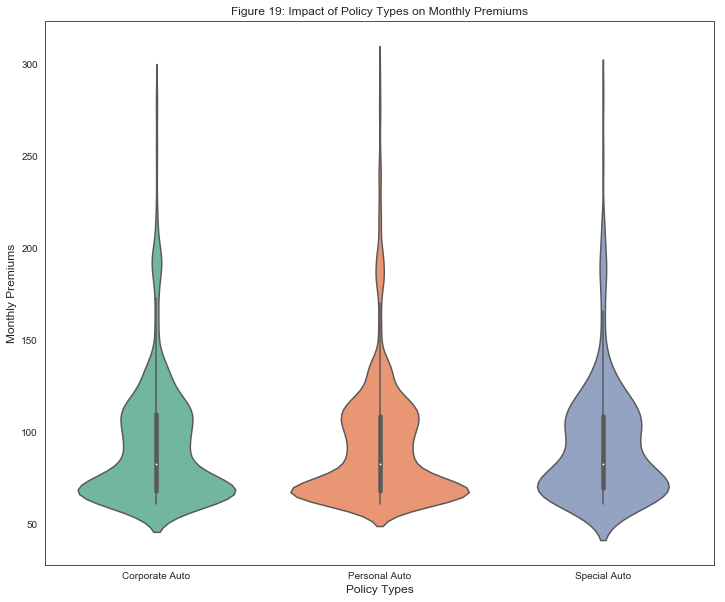

                MonthlyPremiumAuto
PolicyType                        
Corporate Auto           93.238313
Personal Auto            93.230849
Special Auto             92.912698


In [275]:
sns.violinplot(x="PolicyType",y='MonthlyPremiumAuto', data=df,palette="Set2")
plot_sp('Figure 19: Impact of Policy Types on Monthly Premiums',12,
        'Policy Types','Monthly Premiums')
mean_policy_type=df.groupby('PolicyType').agg({'MonthlyPremiumAuto':'mean'})
print(mean_policy_type)

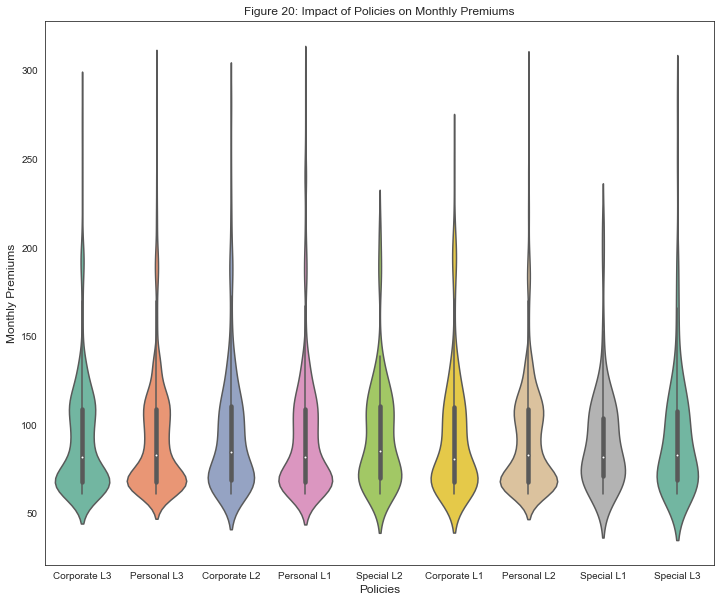

              MonthlyPremiumAuto
Policy                          
Corporate L1           93.763231
Corporate L2           94.791597
Corporate L3           92.141026
Personal L1            93.269355
Personal L2            92.713007
Personal L3            93.537653
Special L1             91.242424
Special L2             93.585366
Special L3             92.912162


In [276]:
sns.violinplot(x="Policy", y='MonthlyPremiumAuto',data=df,palette="Set2")
plot_sp('Figure 20: Impact of Policies on Monthly Premiums',12,
        'Policies','Monthly Premiums')
mean_policy=df.groupby('Policy').agg({'MonthlyPremiumAuto':'mean'})
print(mean_policy)

The bare minimum car insurance requirement for Oklahoma,Nebraska and Kansas drivers is:
    
    1 $25,000  bodily injury per person per accident.
    
    2 $50,000 bodily injury for all persons per accident.
    
    3 $25,000 property damage liability.
    
    4 $25,000/$50,000 uninsured motorist bodily injury.

The bare minimum car insurance requirement for Iowa drivers is:
    
    1 $20,000 bodily injury per person per accident.
    
    2 $40,000 bodily injury for all persons per accident.
    
    3 $20,000/$40,000 uninsured motorist bodily injury.

The bare minimum car insurance requirement for Missouri drivers is:
    
    1 $25,000 bodily injury per person per accident.
    
    2 $50,000 bodily injury for all persons per accident.
    
    3 $10,000 property damage liability.
    

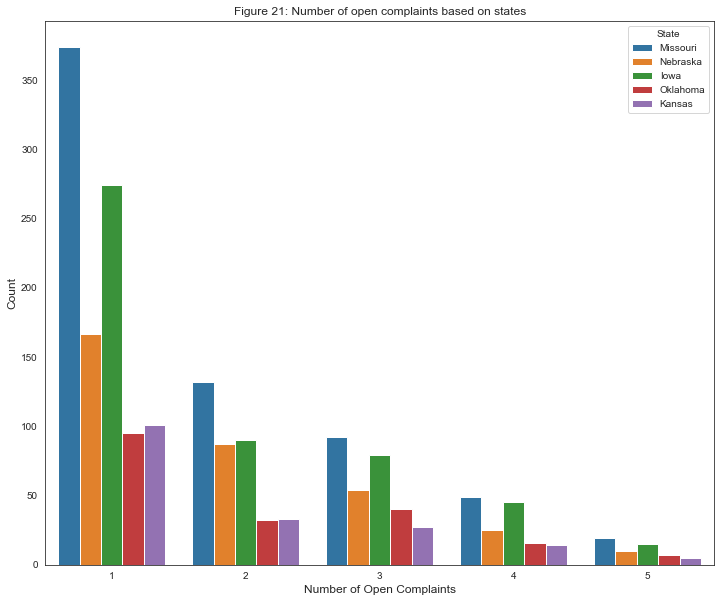

In [277]:
open_complaints=df[df.NumberofOpenComplaints!=0]
sns.countplot(x='NumberofOpenComplaints',data=open_complaints,hue='State')
plot_sp('Figure 21: Number of open complaints based on states',12,
        'Number of Open Complaints','Count')

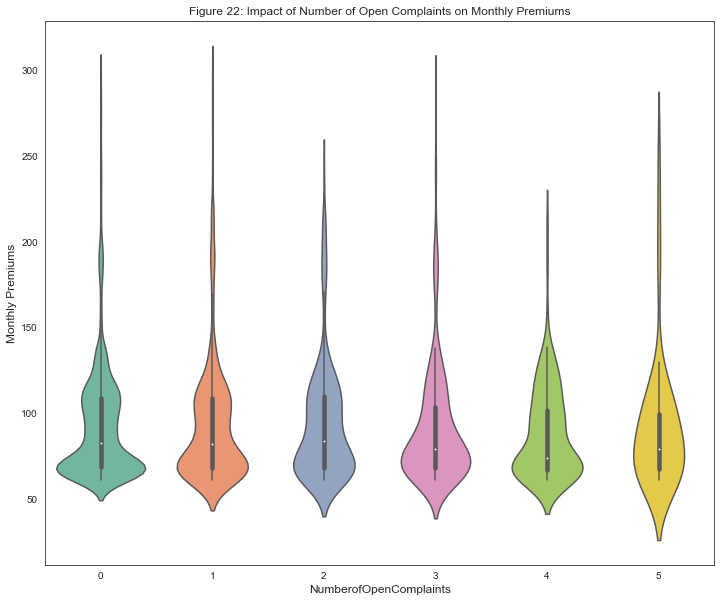

                        MonthlyPremiumAuto
NumberofOpenComplaints                    
0                                93.335907
1                                93.256182
2                                94.168449
3                                91.527397
4                                88.516779
5                                92.446429


In [278]:
sns.violinplot(x="NumberofOpenComplaints", y='MonthlyPremiumAuto',data=df,palette="Set2")
plot_sp('Figure 22: Impact of Number of Open Complaints on Monthly Premiums',12,
        'NumberofOpenComplaints','Monthly Premiums')
mean_num_comp=df.groupby('NumberofOpenComplaints').agg({'MonthlyPremiumAuto':'mean'})
print(mean_num_comp)

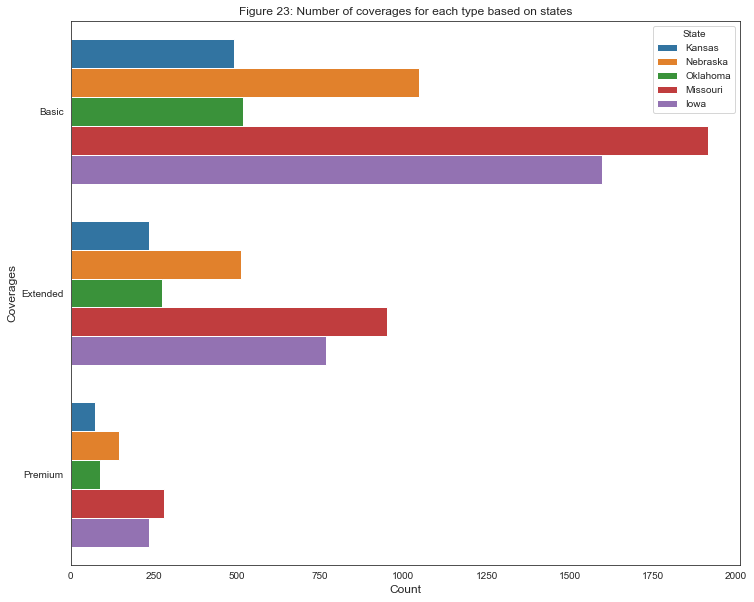

In [279]:
ax = sns.countplot(y="Coverage", hue="State", data=df)
plot_sp('Figure 23: Number of coverages for each type based on states',12,
        'Count','Coverages')

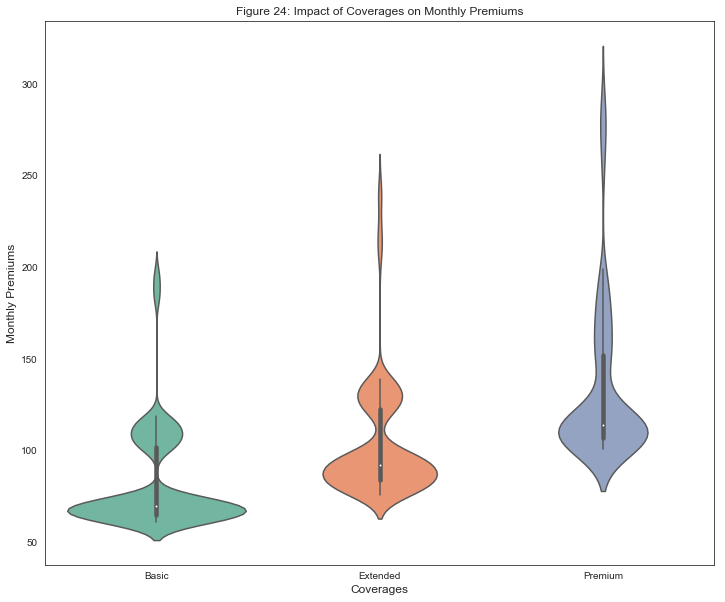

          MonthlyPremiumAuto
Coverage                    
Basic              82.173851
Extended          103.579504
Premium           133.381068


In [280]:
sns.violinplot(x="Coverage", y='MonthlyPremiumAuto',data=df,palette="Set2")
plot_sp('Figure 24: Impact of Coverages on Monthly Premiums',12,
        'Coverages','Monthly Premiums')
mean_coverage=df.groupby('Coverage').agg({'MonthlyPremiumAuto':'mean'})
print(mean_coverage)

According to Figure 18,19,20, there is no significant relationship between the monthly premiums of a policyholder and the number and the type of policies. Monthly premiums change between 50 and 150 dolar.However, the type of coverage affects the monthly premiums. Basic coverages have lower premiums, whereas the premium coverages have higher premiums.

### Demographic features

#### Education

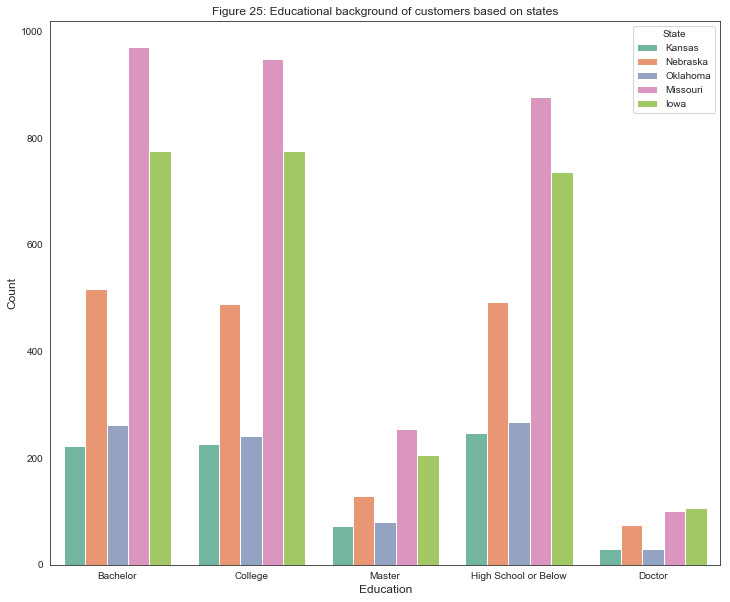

In [281]:
sns.countplot(x="Education",hue='State', data=df,palette="Set2")
plot_sp('Figure 25: Educational background of customers based on states',12,
        'Education','Count')

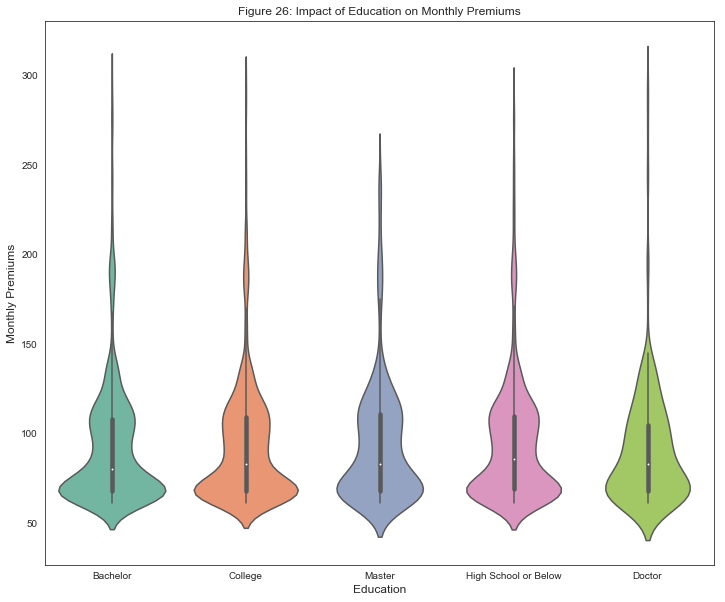

                      MonthlyPremiumAuto
Education                               
Bachelor                       92.495633
College                        92.665423
Doctor                         90.713450
High School or Below           94.638444
Master                         94.041835


In [282]:
sns.violinplot(x="Education", y='MonthlyPremiumAuto',data=df,palette="Set2")
plot_sp('Figure 26: Impact of Education on Monthly Premiums',12,
        'Education','Monthly Premiums')
mean_edu=df.groupby('Education').agg({'MonthlyPremiumAuto':'mean'})
print(mean_edu)

Figure 26 shows that although the education level of a policyholder does not significantly impact the monthly premiums, the P.hD. holders have slightly lower monthly premiums than the high school and lower grades holders.

#### Gender

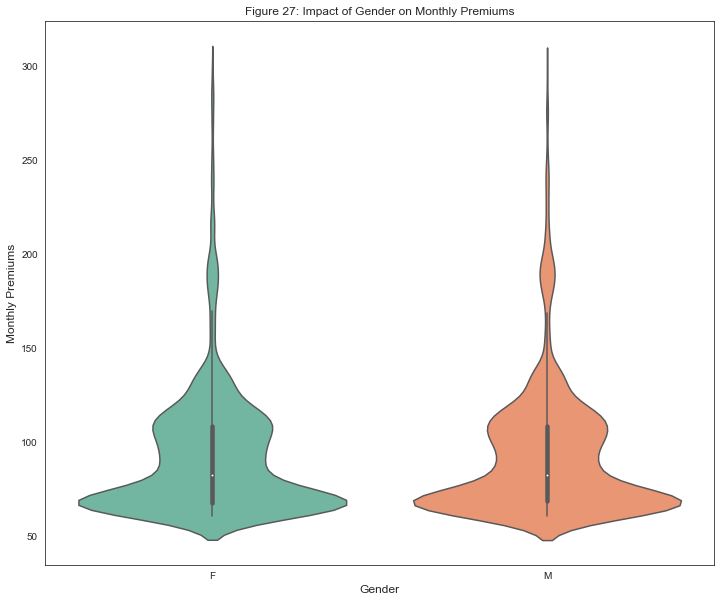

        MonthlyPremiumAuto
Gender                    
F                93.087162
M                93.356792


In [283]:
sns.violinplot(x="Gender",y='MonthlyPremiumAuto', data=df,palette="Set2")
plot_sp('Figure 27: Impact of Gender on Monthly Premiums',12,
        'Gender','Monthly Premiums')
mean_gender=df.groupby('Gender').agg({'MonthlyPremiumAuto':'mean'})
print(mean_gender)

Figure 27 shows that gender does not have a significant impact on monthly premiums.

#### Employment Status

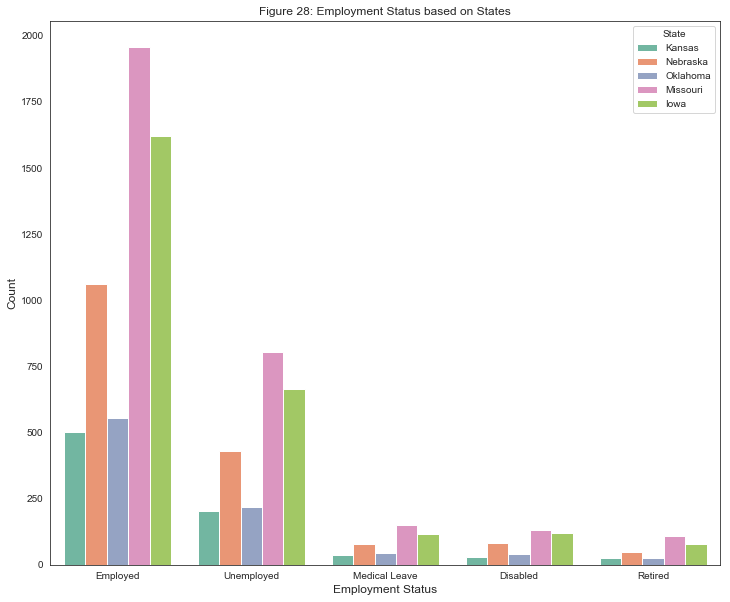

In [284]:
sns.countplot(x="EmploymentStatus",hue='State', data=df,palette="Set2")
plot_sp('Figure 28: Employment Status based on States',12,
        'Employment Status','Count')

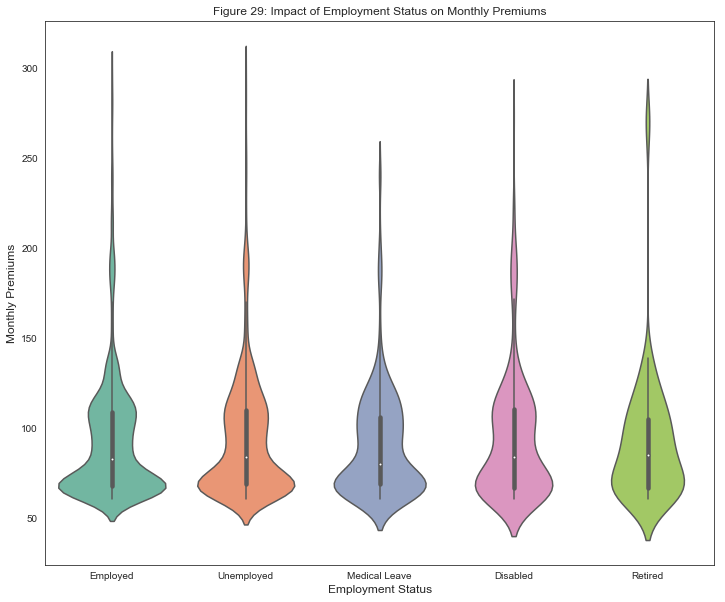

                  MonthlyPremiumAuto
EmploymentStatus                    
Disabled                   93.674074
Employed                   93.212706
Medical Leave              90.011574
Retired                    91.418440
Unemployed                 93.973241


In [285]:
sns.violinplot(x="EmploymentStatus",y='MonthlyPremiumAuto', data=df,palette="Set2")
plot_sp('Figure 29: Impact of Employment Status on Monthly Premiums',12,
        'Employment Status','Monthly Premiums')
mean_employment=df.groupby('EmploymentStatus').agg({'MonthlyPremiumAuto':'mean'})
print(mean_employment)

Figure 29 shows that employment status does not have a significant impact on monthly premiums.

#### Marital Status

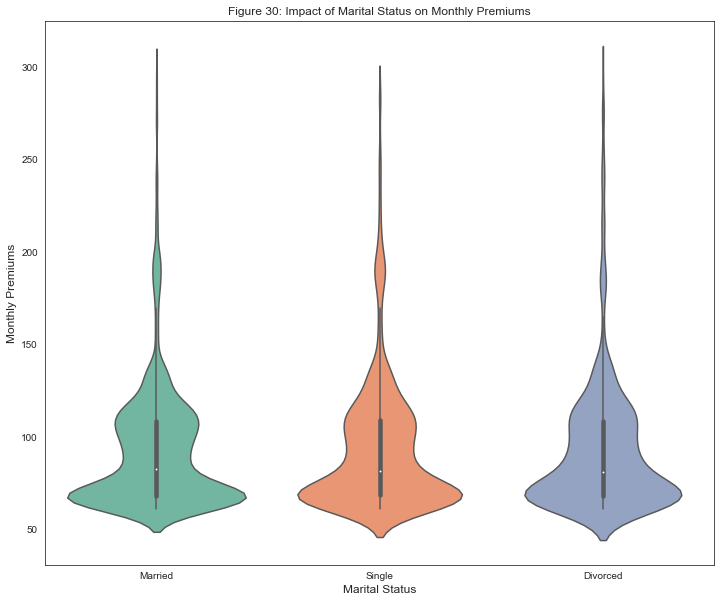

               MonthlyPremiumAuto
MaritalStatus                    
Divorced                92.602630
Married                 93.068705
Single                  93.884880


In [286]:
sns.violinplot(x="MaritalStatus",y='MonthlyPremiumAuto', data=df,palette="Set2")
plot_sp('Figure 30: Impact of Marital Status on Monthly Premiums',12,
        'Marital Status','Monthly Premiums')
mean_marital=df.groupby('MaritalStatus').agg({'MonthlyPremiumAuto':'mean'})
print(mean_marital)

Figure 30 shows that marital does not have an impact on monthly premiums.

#### Location Code

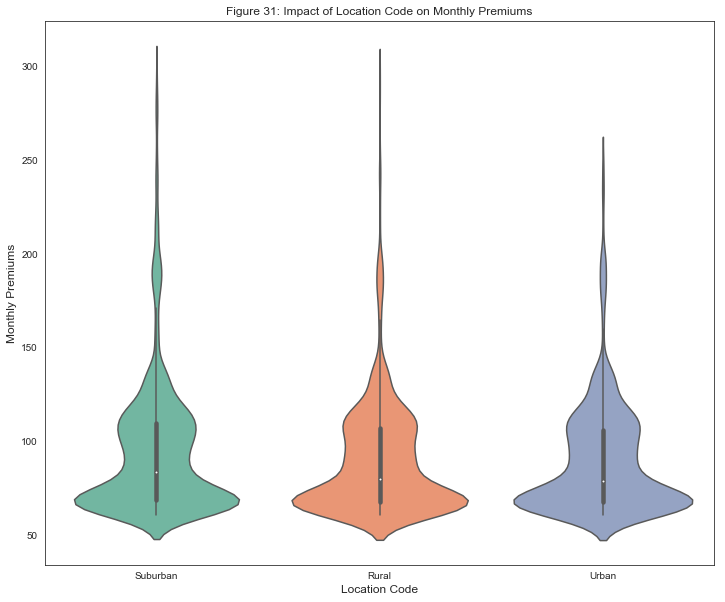

              MonthlyPremiumAuto
LocationCode                    
Rural                  89.805979
Suburban               95.227029
Urban                  89.710493


In [287]:
sns.violinplot(x="LocationCode",y='MonthlyPremiumAuto', data=df,palette="Set2")
plot_sp('Figure 31: Impact of Location Code on Monthly Premiums',12,
        'Location Code','Monthly Premiums')
mean_loc=df.groupby('LocationCode').agg({'MonthlyPremiumAuto':'mean'})
print(mean_loc)

Figure 31 shows that urban and rural policyholders have lower monthly premiums than suburban ones.

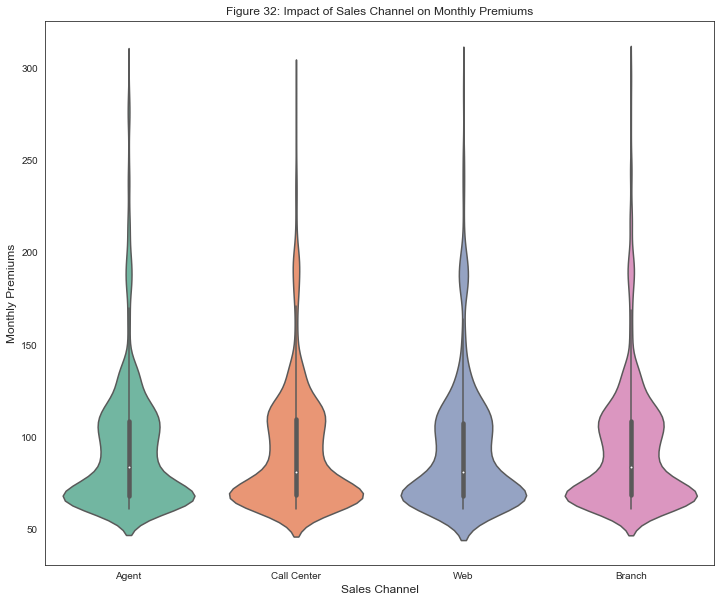

              MonthlyPremiumAuto
SalesChannel                    
Agent                  93.679034
Branch                 93.306973
Call Center            92.482153
Web                    92.824906


In [288]:
sns.violinplot(x="SalesChannel",y='MonthlyPremiumAuto', data=df,palette="Set2")
plot_sp('Figure 32: Impact of Sales Channel on Monthly Premiums',12,
        'Sales Channel','Monthly Premiums')
mean_sale=df.groupby('SalesChannel').agg({'MonthlyPremiumAuto':'mean'})
print(mean_sale)

Figure 32 shows that sales channel does not have a significant impact on the monthly premiums.

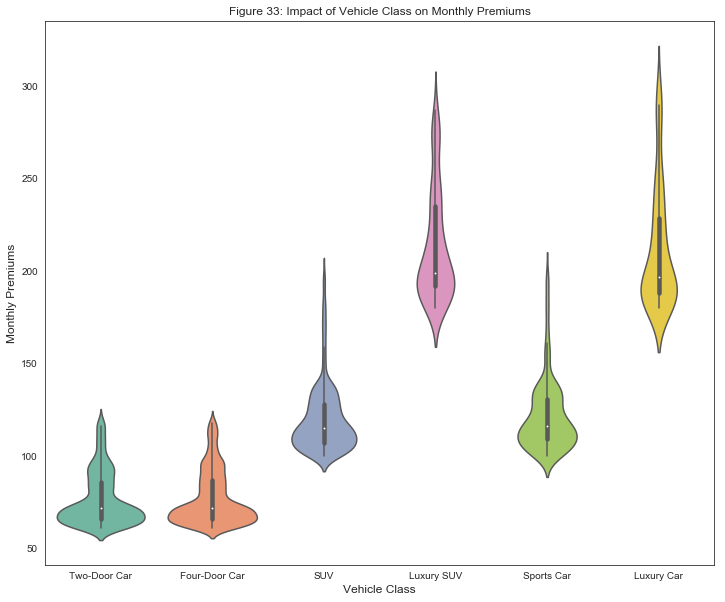

               MonthlyPremiumAuto
VehicleClass                     
Four-Door Car           77.423718
Luxury Car             212.116564
Luxury SUV             213.184783
SUV                    120.164254
Sports Car             121.878099
Two-Door Car            76.927359


In [289]:
sns.violinplot(x="VehicleClass",y='MonthlyPremiumAuto', data=df,palette="Set2")
plot_sp('Figure 33: Impact of Vehicle Class on Monthly Premiums',12,
        'Vehicle Class','Monthly Premiums')
mean_v_class=df.groupby('VehicleClass').agg({'MonthlyPremiumAuto':'mean'})
print(mean_v_class)

The lowest monthly premium belongs to two-door and four-door car types. Luxury cars have the highest monthly premiums.

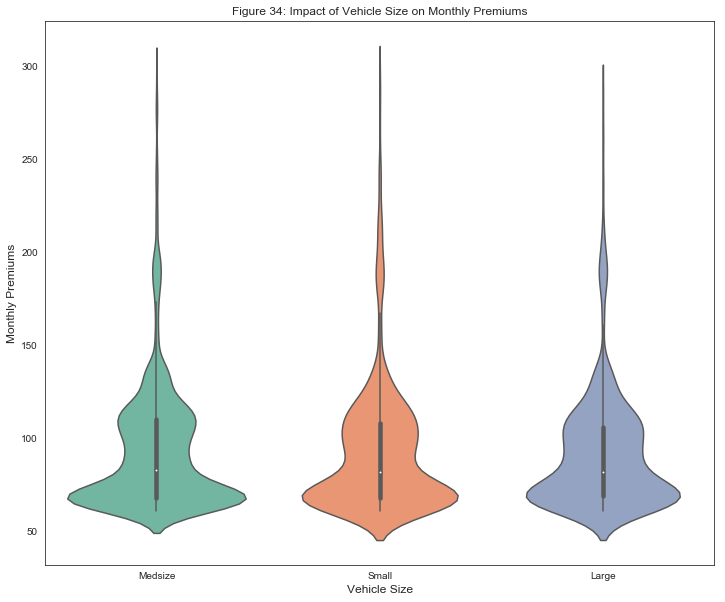

             MonthlyPremiumAuto
VehicleSize                    
Large                 91.464059
Medsize               93.532067
Small                 93.021542


In [290]:
sns.violinplot(x="VehicleSize",y='MonthlyPremiumAuto', data=df,palette="Set2")
plot_sp('Figure 34: Impact of Vehicle Size on Monthly Premiums',12,
        'Vehicle Size','Monthly Premiums')
mean_v_size=df.groupby('VehicleSize').agg({'MonthlyPremiumAuto':'mean'})
print(mean_v_size)

Figure 34 shows that vehicle size does not have a significant impact on the monthly premiums.

## How claim reasons correlate with other factors?

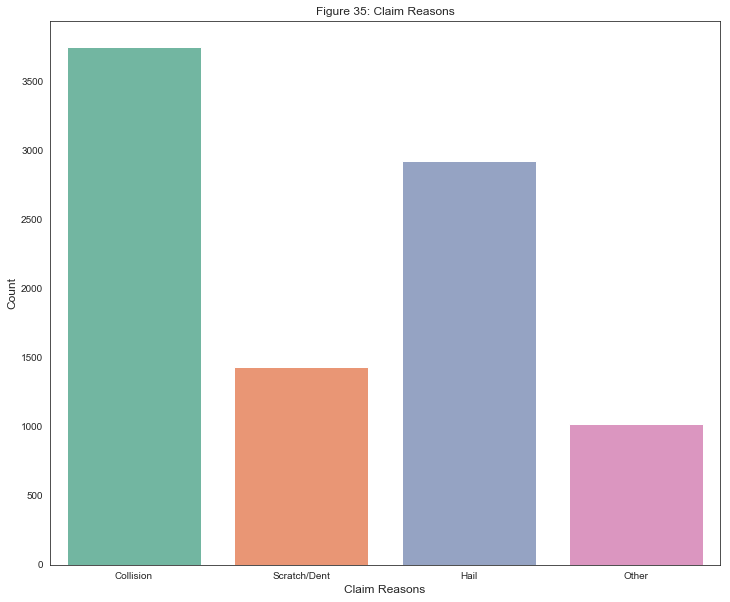

In [291]:
sns.countplot(x="ClaimReason", data=df,palette="Set2")
plot_sp('Figure 35: Claim Reasons',12,
        'Claim Reasons','Count')

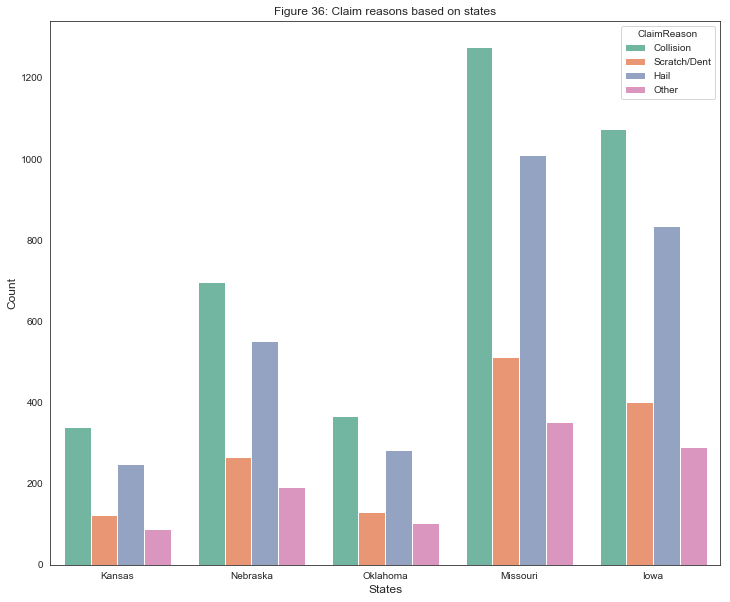

In [292]:
sns.countplot(x="State",hue='ClaimReason', data=df,palette="Set2")
plot_sp('Figure 36: Claim reasons based on states',12,
        'States','Count')
plt.show()

Collision is the primary claim reason in each state. The next most frequent claim reason is hail. This is normal because Nebraska, Missouri, and Kansas are in the top 5 states in the U.S. for hail loss (2019).

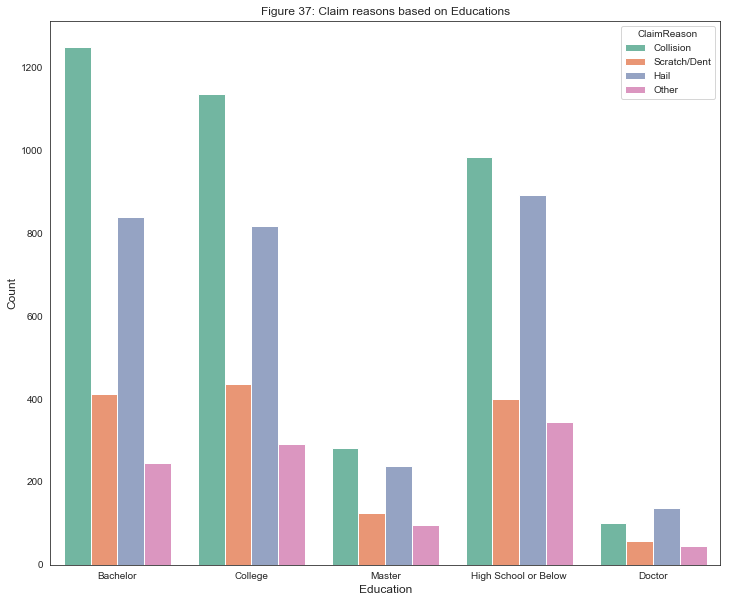

In [293]:
sns.countplot(x="Education",hue='ClaimReason', data=df,palette="Set2")
plot_sp('Figure 37: Claim reasons based on Educations',12,
        'Education','Count')
plt.show()

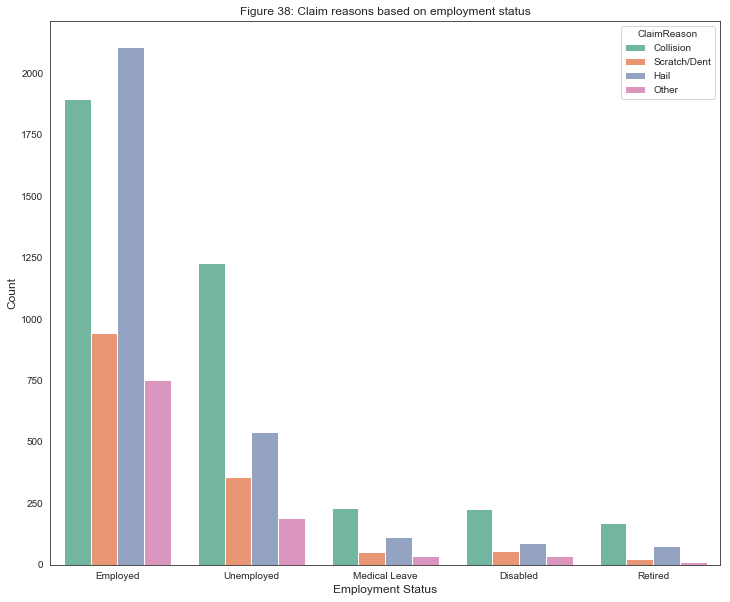

In [294]:
sns.countplot(x="EmploymentStatus",hue='ClaimReason', data=df,palette="Set2")
plot_sp('Figure 38: Claim reasons based on employment status',12,
        'Employment Status','Count')
plt.show()

Employed policyholders constitute the highest number of policyholders who have the claim reason for hail. The reason can be that these policyholders drive their cars more frequently than the others.

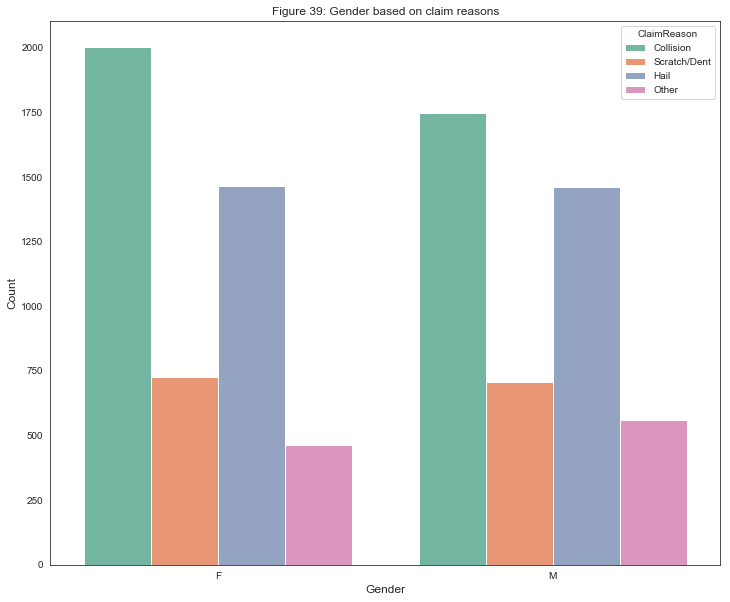

In [295]:
sns.countplot(x="Gender",hue='ClaimReason', data=df,palette="Set2")
plot_sp('Figure 39: Gender based on claim reasons',12,
        'Gender','Count')